In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_df = pd.read_csv('vgsales.csv')
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [3]:
base_df[base_df['Year'].isna()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


### Ordenando os jogos mais vendidos

In [4]:
plataform_wii = base_df.loc[base_df['Platform'] == 'Wii']
plataform_wii.drop('Platform', axis=1, inplace=True)
plataform_wii

C:\Users\igore\AppData\Local\Temp\ipykernel_11772\964535880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plataform_wii.drop('Platform', axis=1, inplace=True)


,Rank,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7,8,Wii Play,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
...,...,...,...,...,...,...,...,...,...,...
16517,16520,Teenage Mutant Ninja Turtles,2007.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01
16552,16555,Mahou Sensei Negima!? Neo-Pactio Fight!!,2007.0,Fighting,Marvelous Interactive,0.00,0.00,0.01,0.00,0.01
16573,16576,Mini Desktop Racing,2007.0,Racing,Popcorn Arcade,0.01,0.00,0.00,0.00,0.01
16574,16577,Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...,2008.0,Racing,Takara Tomy,0.00,0.00,0.01,0.00,0.01


### Rankeando os 10 jogos mais vendidos do nintendo Wii

In [5]:
jogos_mais_vendidos = base_df[['Name', 'Genre', 'Publisher'] + list(base_df.columns[5:])]
jogos_mais_vendidos.head(10)

,Name,Genre,Publisher,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Sports,Nintendo,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,Platform,Nintendo,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Racing,Nintendo,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Sports,Nintendo,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,Role-Playing,Nintendo,Nintendo,11.27,8.89,10.22,1.00,31.37
5,Tetris,Puzzle,Nintendo,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,Platform,Nintendo,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Misc,Nintendo,Nintendo,14.03,9.20,2.93,2.85,29.02
8,New Super Mario Bros. Wii,Platform,Nintendo,Nintendo,14.59,7.06,4.70,2.26,28.62
9,Duck Hunt,Shooter,Nintendo,Nintendo,26.93,0.63,0.28,0.47,28.31


In [6]:
top_10_wii = plataform_wii.sort_values('Global_Sales', ascending=False).head(10)
top_10_wii

,Rank,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7,8,Wii Play,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
13,14,Wii Fit,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
14,15,Wii Fit Plus,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
39,40,Super Smash Bros. Brawl,2008.0,Fighting,Nintendo,6.75,2.61,2.66,1.02,13.04
48,49,Super Mario Galaxy,2007.0,Platform,Nintendo,6.16,3.40,1.20,0.76,11.52
60,61,Just Dance 3,2011.0,Misc,Ubisoft,6.05,3.15,0.00,1.07,10.26


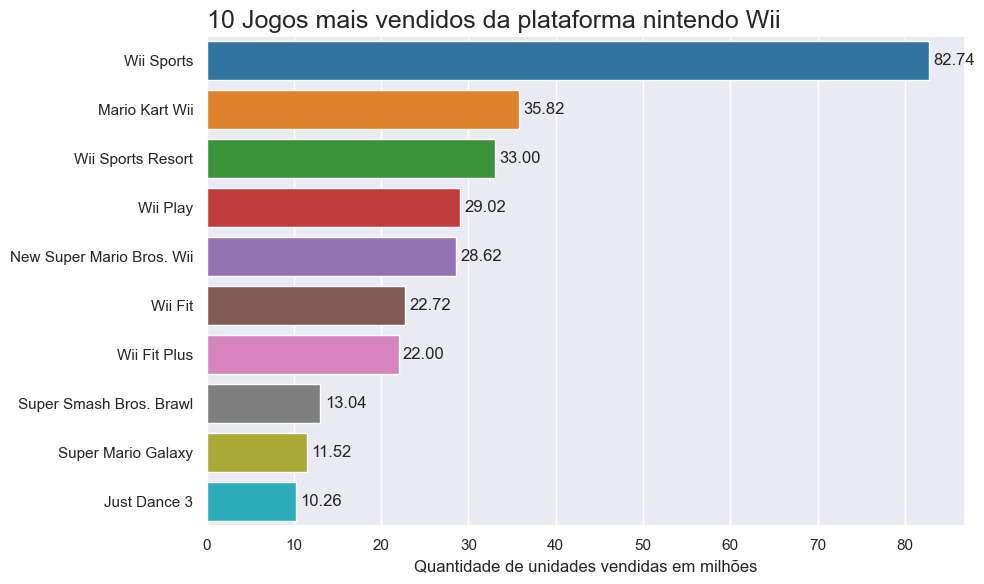

In [7]:
y = top_10_wii['Name'].values
x = top_10_wii['Global_Sales'].values
sns.set_theme()
fig, ax = plt.subplots(figsize=(10,6))
bars = sns.barplot(data=top_10_wii, x=x, y=y, orient='h', palette='tab10', hue=y)
for bar in bars.patches:
    valor = bar.get_width()
    largura = bar.get_y() + bar.get_height() / 2 
    ax.text(
        valor + 0.5,
        largura,
        f'{valor:.2f}',
        va='center'
    )
ax.set_title('10 Jogos mais vendidos da plataforma nintendo Wii', fontsize=18, loc='left')
ax.set_xlabel('Quantidade de unidades vendidas em milhões', fontsize=12)
plt.tight_layout()
plt.show()

### Vamos agrupar os dados por plataforma para saber quais plataformas venderam mais jogos 

In [8]:
plataformas_agrupadas = base_df.groupby('Platform')['Global_Sales'].sum()
plataformas_agrupadas = plataformas_agrupadas.to_frame().reset_index()
plataformas_agrupadas = plataformas_agrupadas.sort_values('Global_Sales', ascending=False).head(10)
plataformas_agrupadas

,Platform,Global_Sales
16,PS2,1255.64
28,X360,979.96
17,PS3,957.84
26,Wii,926.71
4,DS,822.49
15,PS,730.66
6,GBA,318.50
19,PSP,296.28
18,PS4,278.10
13,PC,258.82


C:\Users\igore\AppData\Local\Temp\ipykernel_11772\1881234751.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


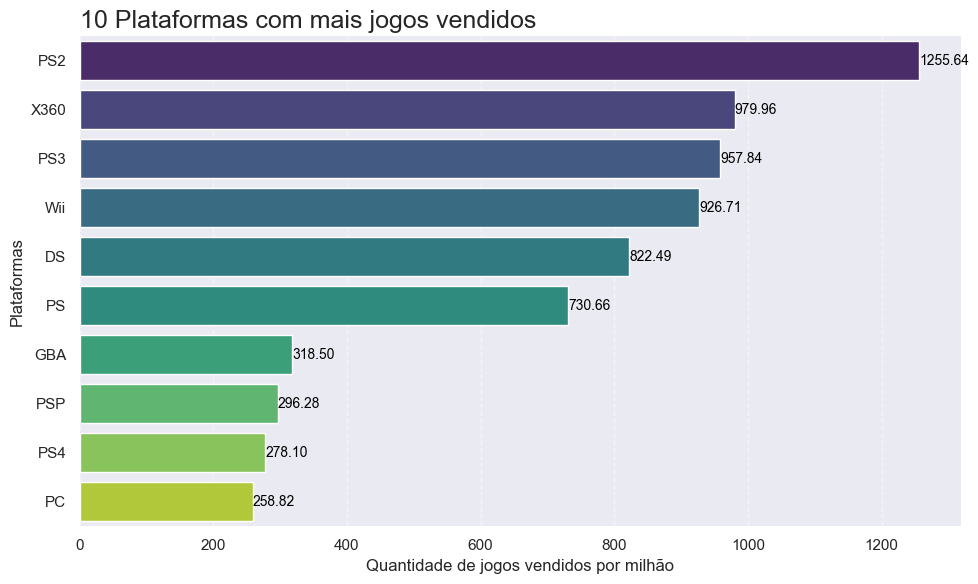

In [9]:
# Define a paleta
palette = sns.color_palette("viridis", n_colors=10)

fig, ax = plt.subplots(figsize=(10, 6))

bars = sns.barplot(
    data=plataformas_agrupadas,
    x='Global_Sales',
    y='Platform',
    palette=palette
)

# Títulos e rótulos
ax.set_xlabel('Quantidade de jogos vendidos por milhão', fontsize=12)
ax.set_ylabel('Plataformas', fontsize=12)
ax.set_title('10 Plataformas com mais jogos vendidos', fontsize=18, loc='left')

# Adiciona os valores nas barras
for bar in bars.patches:
    valor = bar.get_width()
    largura = bar.get_y() + bar.get_height() / 2
    ax.text(
        valor + 0.3,
        largura,
        f'{valor:.2f}',
        va='center',
        fontsize=10,
        color='black'
    )

# Estilo final
sns.despine(left=True, bottom=True)
ax.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Vamos comparar os anos com o numero de venda por ano
- Primeiro vamos tratar os dados e remover os valores nan da coluna Year

In [10]:
vendas_por_ano = base_df[base_df['Year'].notna()]
vendas_por_ano

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [11]:
vendas_por_ano = vendas_por_ano.groupby('Year')['Global_Sales'].sum()

In [12]:
vendas_por_ano = vendas_por_ano.to_frame().reset_index()

In [13]:
vendas_por_ano

,Year,Global_Sales
0,1980.0,11.38
1,1981.0,35.77
2,1982.0,28.86
3,1983.0,16.79
4,1984.0,50.36
5,1985.0,53.94
6,1986.0,37.07
7,1987.0,21.74
8,1988.0,47.22
9,1989.0,73.45


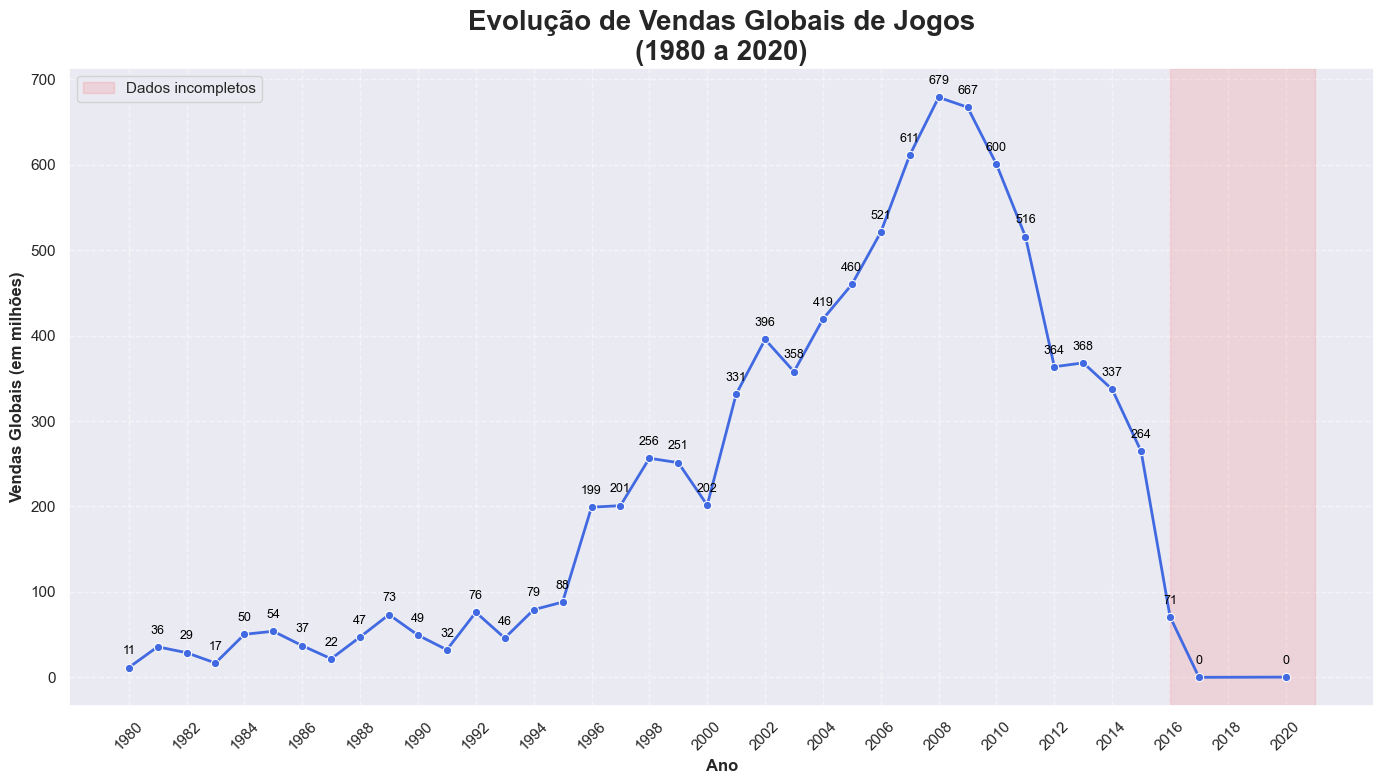

In [14]:
fig, ax = plt.subplots(figsize=(14,8))

# Linha principal
sns.lineplot(data=vendas_por_ano, x='Year', y='Global_Sales', marker='o', color='royalblue', linewidth=2)

# Destaque para anos com dados incompletos
plt.axvspan(2016, 2021, color='red', alpha=0.1, label='Dados incompletos')

# Rótulos de valores sobre os pontos
for i, row in vendas_por_ano.iterrows():
    if row['Global_Sales'] > 0:
        ax.text(row['Year'], row['Global_Sales'] + 12,
                f'{row["Global_Sales"]:.0f}',
                ha='center', va='bottom', fontsize=9, color='black')

# Título com destaque
ax.set_title('Evolução de Vendas Globais de Jogos\n(1980 a 2020)', fontsize=20, fontweight='bold', loc='center')

# Rótulos dos eixos
ax.set_xlabel('Ano', fontsize=12, fontweight='bold')
ax.set_ylabel('Vendas Globais (em milhões)', fontsize=12, fontweight='bold')

# Customização do eixo X
plt.xticks(ticks=range(1980, 2021, 2), rotation=45)

# Grade leve para leitura
ax.grid(True, linestyle='--', alpha=0.5)

# Legenda
plt.legend(loc='upper left')
plt.savefig('evolucao_vendas_g')

# Layout ajustado
plt.tight_layout()
plt.show()

### 📝 Análise da queda nas vendas após 2008
Apesar do pico nas vendas globais de jogos em 2008 e 2009, observa-se uma queda acentuada nos anos seguintes. Esse declínio, no entanto, não representa necessariamente uma retração da indústria de games, mas sim uma transformação significativa em seus modelos de distribuição e consumo. A partir de 2010, as vendas digitais passaram a ganhar força, tornando-se predominantes em plataformas como PlayStation Network, Xbox Live e Steam — formatos que muitos bancos de dados públicos não capturam completamente. Além disso, o crescimento dos jogos mobile, o avanço de modelos free-to-play e por assinatura, bem como a comercialização de DLCs e microtransações, alteraram a forma como a receita é gerada no setor. Assim, a queda observada nas vendas físicas reflete muito mais uma mudança de paradigma do que uma perda de interesse pelo mercado de jogos.

### Vamos analisar a venda de jogos por genero 

In [15]:
venda_por_genero = base_df[base_df['Genre'].notna()] # pega somente as linhas do df que a coluna gener nao e nan
venda_por_genero = venda_por_genero.groupby('Genre')['Global_Sales'].sum() # Agrupa os dados pelo genero e soma os valores da coluna Global_Sales
venda_por_genero = venda_por_genero.to_frame().reset_index() # Converte para dataframe e reseta o index
venda_por_genero = venda_por_genero.sort_values('Global_Sales', ascending=False) # ordena os valores de Global_Sales por ordem decrescente
venda_por_genero

,Genre,Global_Sales
0,Action,1751.18
10,Sports,1330.93
8,Shooter,1037.37
7,Role-Playing,927.37
4,Platform,831.37
3,Misc,809.96
6,Racing,732.04
2,Fighting,448.91
9,Simulation,392.20
5,Puzzle,244.95


C:\Users\igore\AppData\Local\Temp\ipykernel_11772\3382310567.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(
C:\Users\igore\AppData\Local\Temp\ipykernel_11772\3382310567.py:5: UserWarning: 
The palette list has fewer values (10) than needed (12) and will cycle, which may produce an uninterpretable plot.
  bars = sns.barplot(


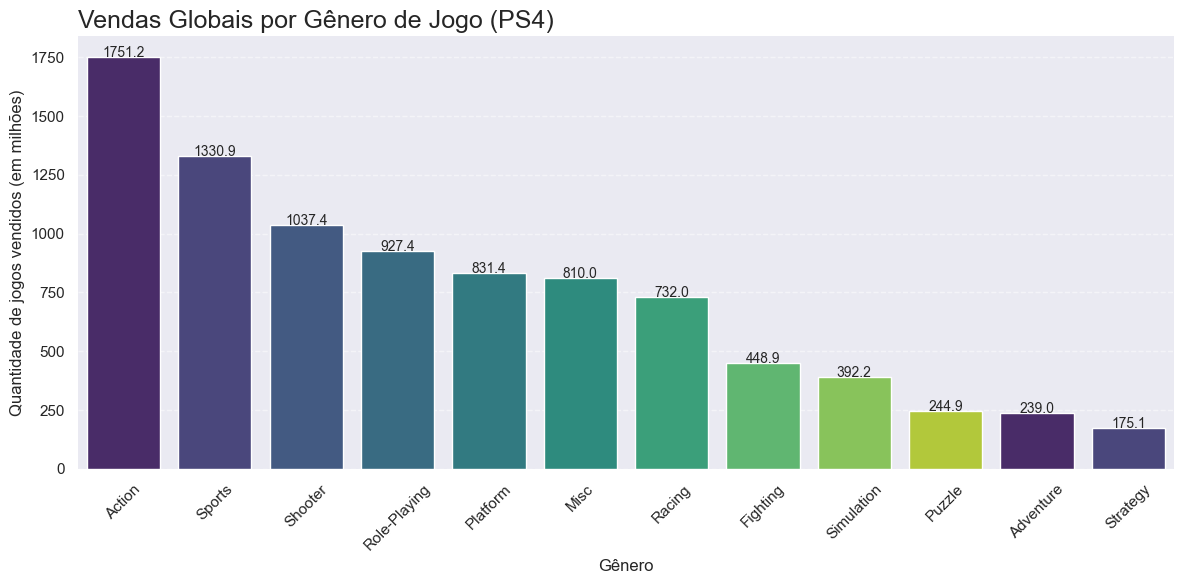

In [16]:
palette = sns.color_palette("viridis", n_colors=10)

fig, ax = plt.subplots(figsize=(12, 6))

bars = sns.barplot(
    data=venda_por_genero,
    x='Genre',
    y='Global_Sales',
    palette=palette
)

ax.set_xlabel('Gênero', fontsize=12)
ax.set_ylabel('Quantidade de jogos vendidos (em milhões)', fontsize=12)
ax.set_title('Vendas Globais por Gênero de Jogo (PS4)', fontsize=18, loc='left')


for bar in bars.patches:
    valor = bar.get_height()
    largura = bar.get_x() + bar.get_width() / 2
    ax.text(largura, valor + 0.3, f'{valor:.1f}', ha='center', fontsize=10)

# Estilo final
sns.despine(left=True, bottom=True)
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Análise interpretativa
    A análise das vendas globais por gênero mostra que os jogos de ação lideram o mercado, acumulando o maior volume de vendas ao longo dos anos. Em seguida, aparecem os gêneros de esportes e tiro (shooter), o que reforça a popularidade de franquias como FIFA, Call of Duty e Madden NFL. Gêneros como plataforma e corrida também se destacam, impulsionados por títulos clássicos como Mario, Sonic e Need for Speed. Essa distribuição revela uma forte preferência dos consumidores por jogos com alta ação, competitividade e mecânicas acessíveis.

# Vamos analisar quais editoras mais venderam jogos no playstation 4

In [17]:
len(base_df['Platform'].unique())

31

In [18]:
editoras_df = base_df[base_df['Publisher'].notna()]
editoras_df = base_df.groupby('Publisher')[['NA_Sales', 'JP_Sales', 'Global_Sales']].sum()
editoras_df = editoras_df.sort_values('Global_Sales', ascending=False).reset_index()
editoras_df

,Publisher,NA_Sales,JP_Sales,Global_Sales
0,Nintendo,816.87,455.42,1786.56
1,Electronic Arts,595.07,14.04,1110.32
2,Activision,429.70,6.54,727.46
3,Sony Computer Entertainment,265.22,74.10,607.50
4,Ubisoft,253.43,7.50,474.72
...,...,...,...,...
573,Epic Games,0.01,0.00,0.01
574,UIG Entertainment,0.00,0.00,0.01
575,Commseed,0.00,0.01,0.01
576,Ascaron Entertainment,0.00,0.00,0.01


In [19]:
len(base_df['Publisher'].loc[base_df['Platform'] == 'PS4'].unique())

67

In [20]:
ps4 = base_df[base_df['Platform'] == 'PS4']
ps4 = ps4.drop('Platform', axis=1)
ps4.sort_values('Global_Sales', ascending=False)

,Rank,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
33,34,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
44,45,Grand Theft Auto V,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
77,78,FIFA 16,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
92,93,Star Wars Battlefront (2015),2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
93,94,Call of Duty: Advanced Warfare,2014.0,Shooter,Activision,2.80,3.30,0.14,1.37,7.60
...,...,...,...,...,...,...,...,...,...,...
16175,16178,Republique,2016.0,Action,Nippon Ichi Software,0.00,0.01,0.01,0.00,0.01
16550,16553,God Eater Off Shot: Tachibana Sakuya-hen Twin ...,2016.0,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
16260,16263,Paragon,2016.0,Action,Epic Games,0.01,0.00,0.00,0.00,0.01
16220,16223,Dynasty Warriors: Eiketsuden,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01


In [21]:
top_10_pub_ps4 = ps4.groupby('Publisher')['Global_Sales'].sum()
top_10_pub_ps4 = top_10_pub_ps4.to_frame().sort_values('Global_Sales', ascending=False).reset_index()
top_10_pub_ps4 = top_10_pub_ps4.head(10)

C:\Users\igore\AppData\Local\Temp\ipykernel_11772\1922636307.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=top_10_pub_ps4, y='Publisher', x='Global_Sales', orient='h', palette=palette)


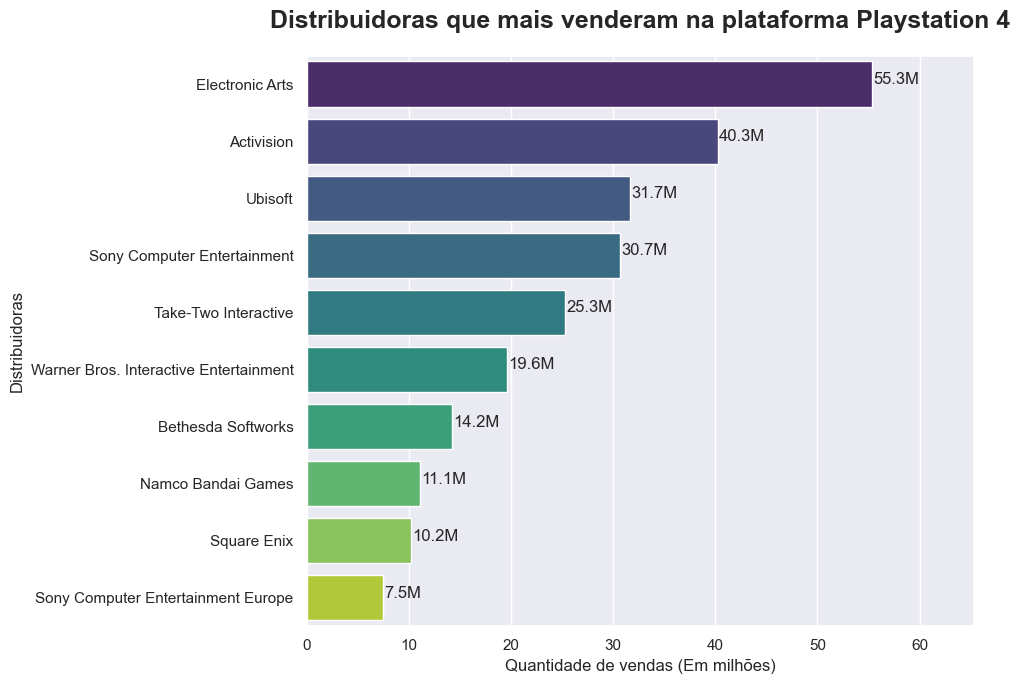

In [22]:
fig, ax = plt.subplots(figsize=(10,7))
sns.set_style("whitegrid")
palette = sns.color_palette('viridis', n_colors=10)
bars = sns.barplot(data=top_10_pub_ps4, y='Publisher', x='Global_Sales', orient='h', palette=palette)
ax.set_xlabel('Quantidade de vendas (Em milhões)')
ax.set_ylabel('Distribuidoras')
ax.set_title('Distribuidoras que mais venderam na plataforma Playstation 4', fontsize=18, fontweight='bold', pad=20)
ax.set_xlim(0, top_10_pub_ps4['Global_Sales'].max() + 10)
for bar in bars.patches:
    valor_barra = bar.get_width()
    altura_barra = bar.get_y() + bar.get_height() / 2
    ax.text(
        valor_barra + 0.1,
        altura_barra,
        f'{valor_barra:.1f}M',
        ha='left',
    )

plt.tight_layout()
plt.show()

In [23]:
top_10_jogos_mais_vendidos = jogos_mais_vendidos.head(10)
top_10_jogos_mais_vendidos

,Name,Genre,Publisher,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Sports,Nintendo,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,Platform,Nintendo,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Racing,Nintendo,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Sports,Nintendo,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,Role-Playing,Nintendo,Nintendo,11.27,8.89,10.22,1.00,31.37
5,Tetris,Puzzle,Nintendo,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,Platform,Nintendo,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Misc,Nintendo,Nintendo,14.03,9.20,2.93,2.85,29.02
8,New Super Mario Bros. Wii,Platform,Nintendo,Nintendo,14.59,7.06,4.70,2.26,28.62
9,Duck Hunt,Shooter,Nintendo,Nintendo,26.93,0.63,0.28,0.47,28.31


In [24]:
vendas_n_globais = list(jogos_mais_vendidos.columns[4:7])
vendas_n_globais

['NA_Sales', 'EU_Sales', 'JP_Sales']

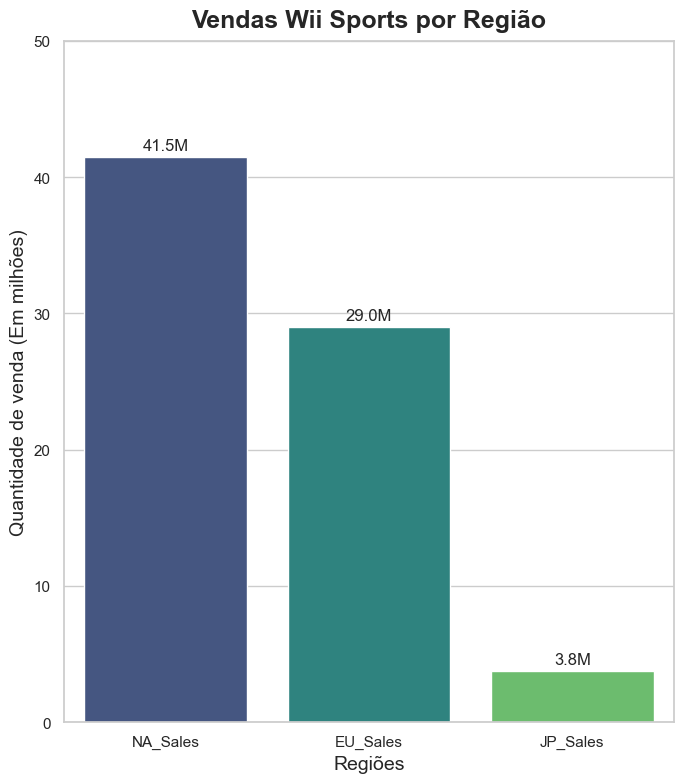

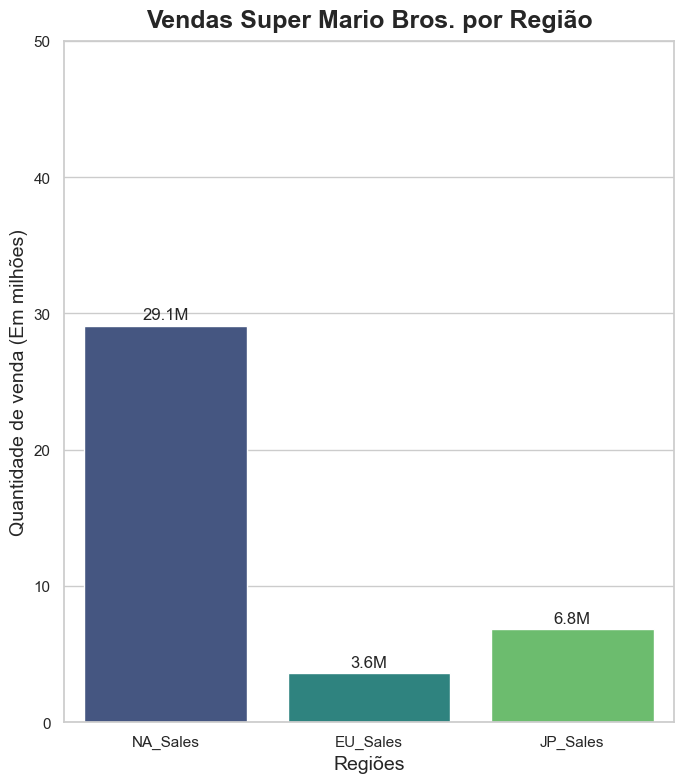

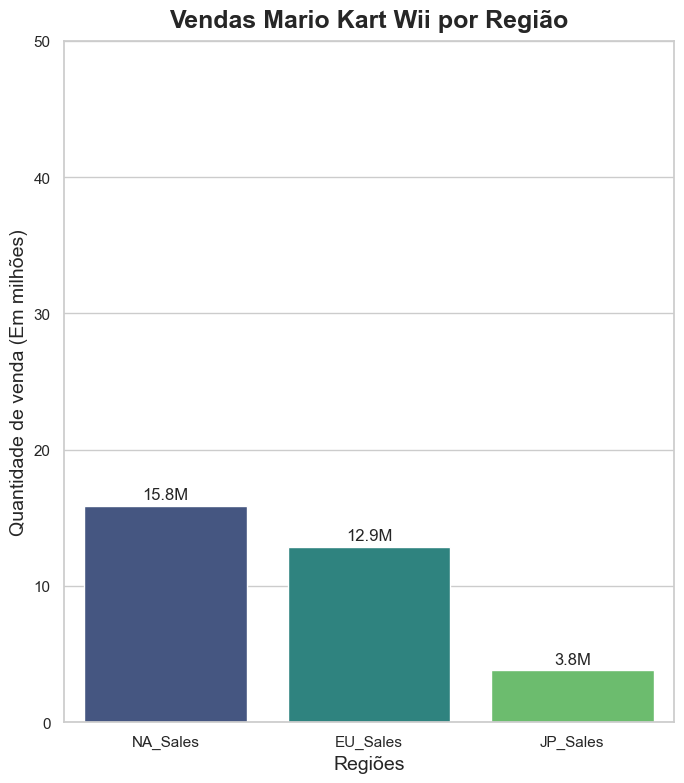

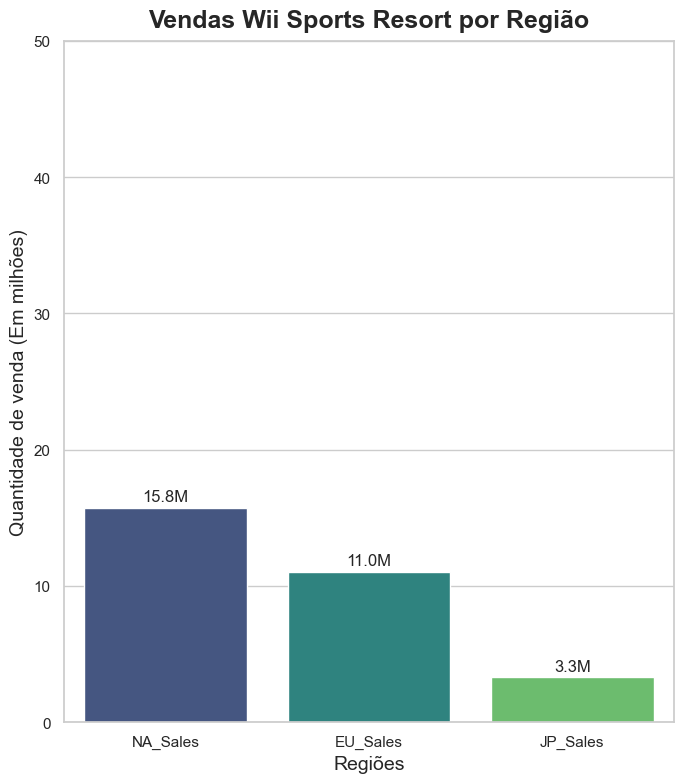

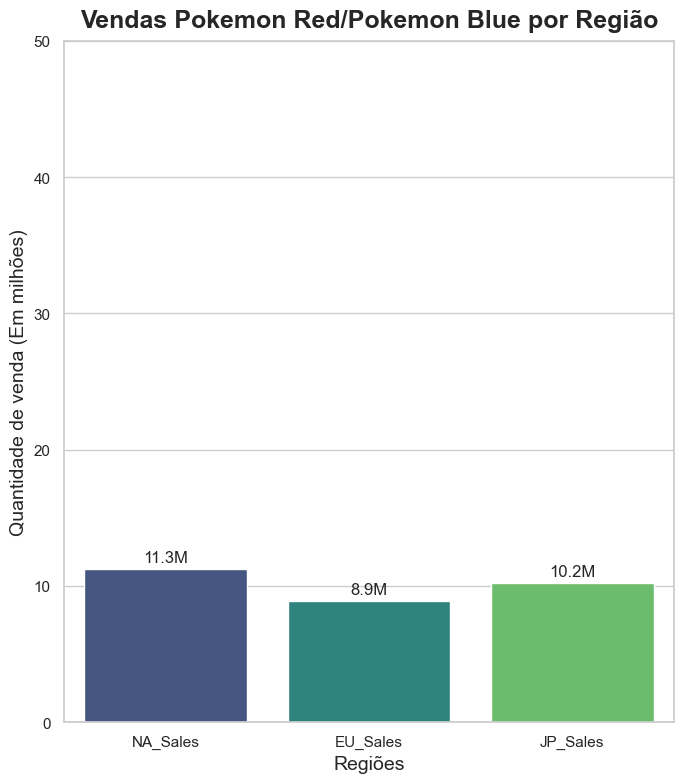

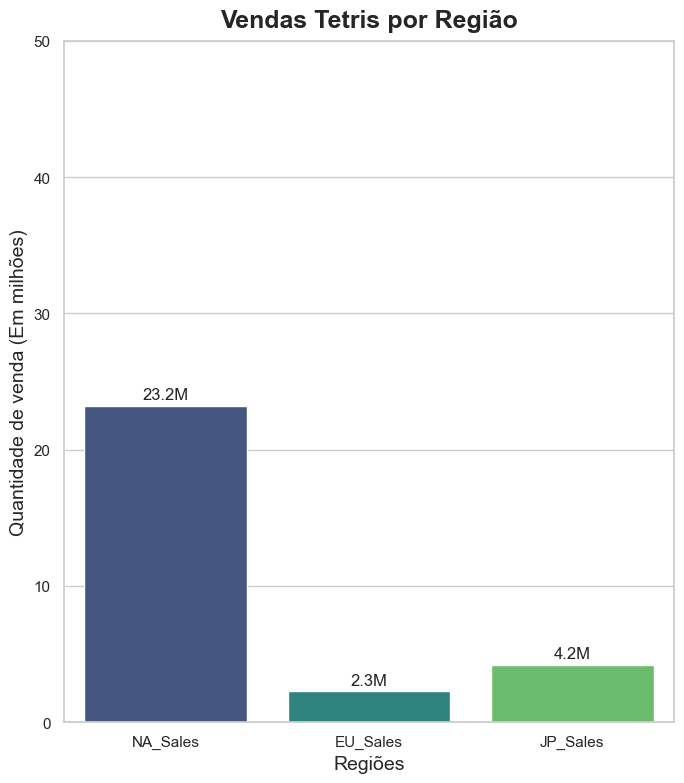

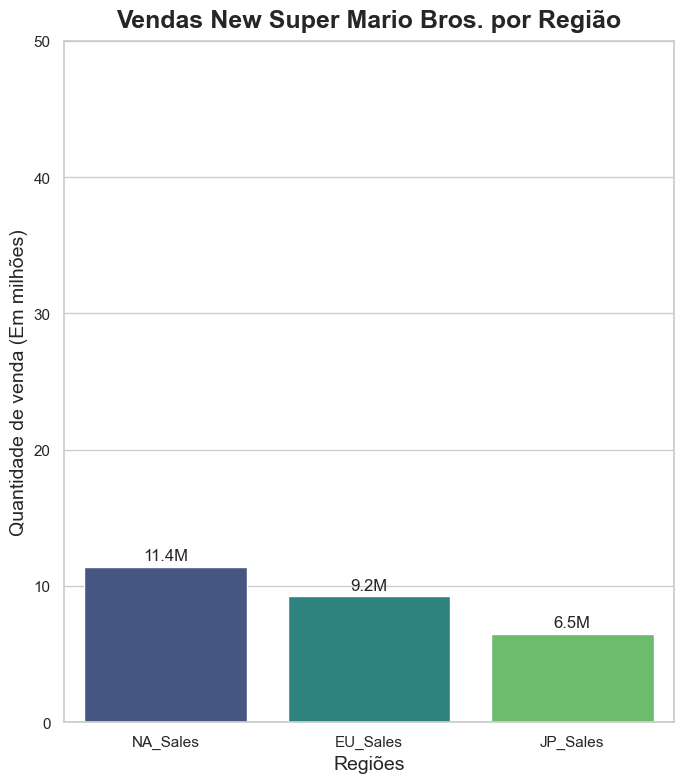

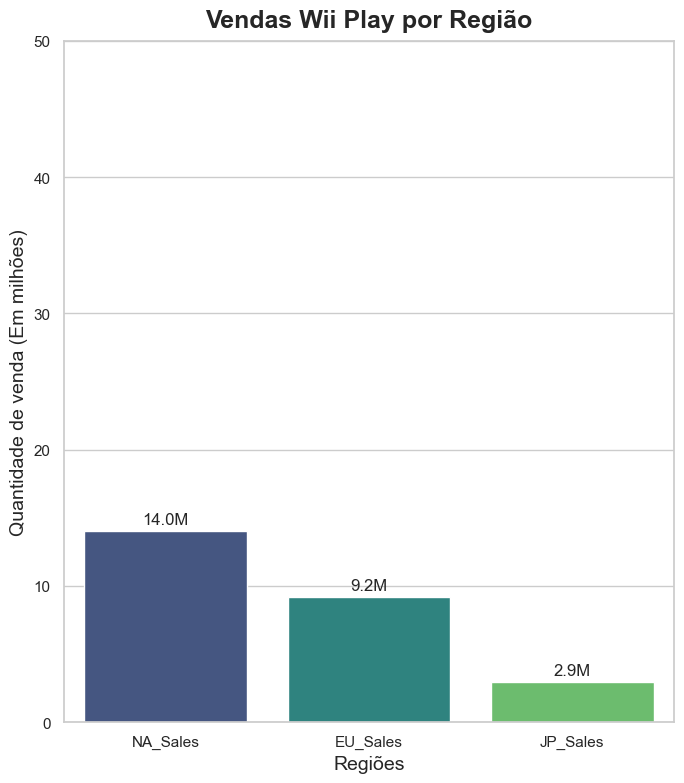

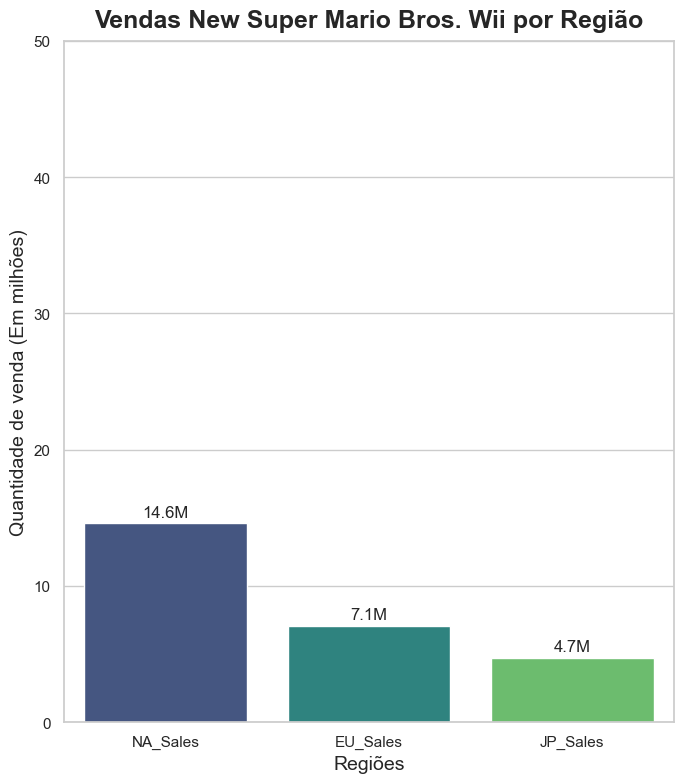

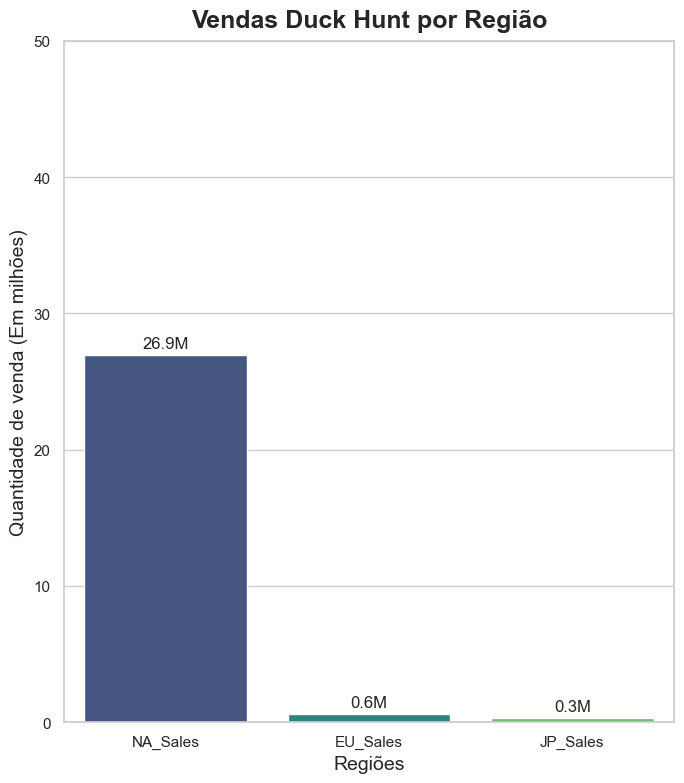

In [25]:
lista_jogos = top_10_jogos_mais_vendidos['Name'].values
for jogo in lista_jogos:
    fig, ax = plt.subplots(figsize=(7,8))
    valores = top_10_jogos_mais_vendidos.loc[top_10_jogos_mais_vendidos['Name'] == jogo, vendas_n_globais].values.flatten()
    bars = sns.barplot(x=vendas_n_globais, y=valores, palette='viridis', hue=vendas_n_globais)

    ax.set_title(f'Vendas {jogo} por Região', fontsize=18, pad=10, fontweight='bold')
    ax.set_xlabel('Regiões', fontsize=14)
    ax.set_ylabel('Quantidade de venda (Em milhões)', fontsize=14)
    plt.ylim(0,50)

    for bar in bars.patches:
        valor_barra = bar.get_height()
        posicao_valor_barra = bar.get_x() + bar.get_width() / 2
        ax.text(
            posicao_valor_barra,
            valor_barra + 0.5,
            f'{valor_barra:.1f}M',
            ha='center'
        )

    plt.tight_layout()
    plt.show()

## 🎮 Análise dos 10 jogos mais vendidos globalmente
### Domínio da Nintendo
Todos os 10 jogos são publicados pela Nintendo, o que confirma o enorme impacto da empresa no mercado de jogos.

Muitos desses títulos vêm acompanhados de consoles (ex: Wii Sports com o Wii), o que impulsiona as vendas.

### Distribuição por região – Tendências Gerais

Região	Tendência Observada
América do Norte (NA)	É onde os jogos mais vendem. Em média, representa mais de 40% das vendas.
Europa (EU)	Segunda maior em volume, com bons números, especialmente para jogos do Wii.
Japão (JP)	Mostra favoritismo por franquias clássicas e RPGs, como Pokémon.
Outras Regiões	Participação mais modesta, mas contribui com cerca de 8–10% das vendas totais.
### Destaques Individuais
1. Wii Sports – 82.74 milhões
NA (41.49M): Quase metade das vendas.

Vendido junto com o console em muitos países → ajudou no pico.

Baixa penetração no Japão (3.77M).

2. Super Mario Bros. – 40.24 milhões
Grande ícone da história dos games.

Muito forte na América do Norte (29.08M).

Japão ainda relevante com 6.81M.

3. Mario Kart Wii – 35.82 milhões
Altamente popular tanto na NA quanto na Europa.

Vendas equilibradas: NA (15.85M), EU (12.88M).

4. Pokémon Red/Blue – 31.37 milhões
Japão lidera com 10.22M, mostrando o apelo da franquia local.

Ainda assim, vendas globais muito bem distribuídas.

5. Tetris (versão Nintendo) – 30.26 milhões
Vendas altas na América do Norte (23.2M).

Europa e Japão com participação discreta.

6. Duck Hunt – 28.31 milhões
Sucesso massivo na América do Norte (26.93M!), mas quase irrelevante nas outras regiões.

### Resumo final: padrões claros
América do Norte é o maior mercado da Nintendo para os títulos listados.

Europa contribui de forma consistente, embora com números menores.

Japão se destaca apenas em títulos com apelo local (Pokémon, Mario).

A diferença regional é gritante em jogos como Duck Hunt e Tetris, enquanto outros como Mario Kart Wii e Pokémon apresentam performance mais equilibrada.

### Vamos analisar os jogos que possui valores NaN na coluna Name ou Publisher

In [26]:
jogos_com_nan = base_df[base_df['Year'].isna() | base_df['Publisher'].isna()]
jogos_com_nan

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


### Analise dos jogos com NaN
 Durante a limpeza de dados, identifiquei 307 jogos com pelo menos uma informação essencial ausente (Year ou Publisher). Curiosamente, mesmo com essas ausências, muitos desses jogos tiveram vendas expressivas, o que mostra sua relevância comercial. No entanto, para garantir a integridade da análise temporal e por distribuidora, esses registros foram tratados separadamente. Essa etapa reforça a importância de entender a estrutura e a qualidade dos dados antes de avançar para visualizações e conclusões.

### Vamos analisar a media de vendas por genero ou publisher 

#### media por Genero

In [43]:
media_por_genero = base_df.groupby('Genre')['Global_Sales'].mean().sort_values( ascending=True)
media_por_genero = media_por_genero * 10
media_por_genero

Genre
Adventure       1.858787
Strategy        2.571512
Puzzle          4.208763
Simulation      4.523645
Misc            4.657619
Action          5.281001
Fighting        5.293750
Sports          5.673188
Racing          5.861009
Role-Playing    6.232325
Shooter         7.918855
Platform        9.383409
Name: Global_Sales, dtype: float64

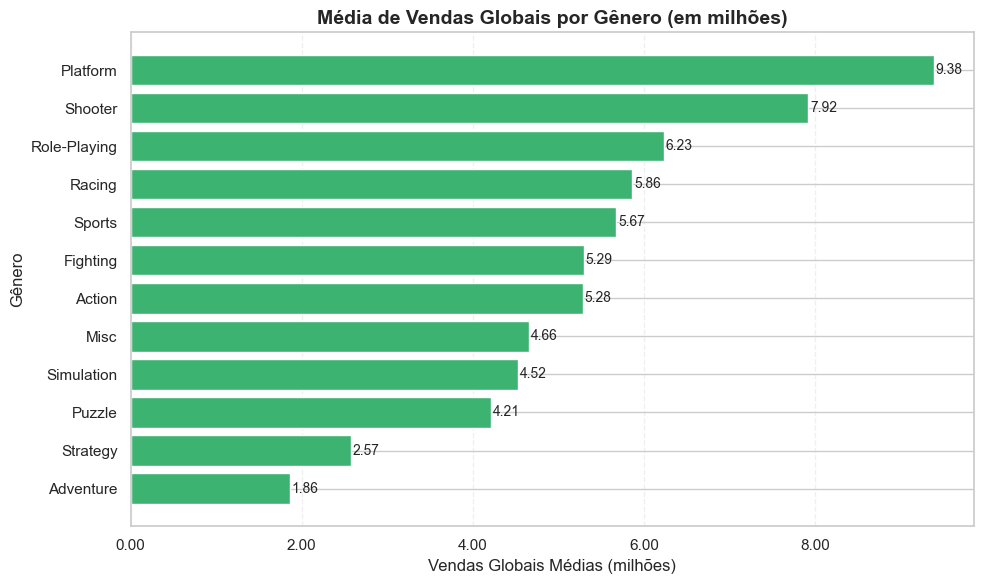

In [44]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(media_por_genero.index, media_por_genero.values, color='mediumseagreen')

# Título e rótulos
ax.set_title('Média de Vendas Globais por Gênero (em milhões)', fontsize=14, weight='bold')
ax.set_xlabel('Vendas Globais Médias (milhões)', fontsize=12)
ax.set_ylabel('Gênero', fontsize=12)

# Formatador do eixo X com separador de milhar e 2 casas decimais
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.2f}'))

# Adiciona os rótulos no final de cada barra
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.02, bar.get_y() + bar.get_height() / 2,
            f'{width:.2f}', va='center', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

#### Agora vamos analisar por publisher

In [58]:
media_por_publisher = base_df.groupby('Publisher')['Global_Sales'].mean()
media_por_publisher

Publisher
10TACLE Studios                 0.036667
1C Company                      0.033333
20th Century Fox Video Games    0.388000
2D Boy                          0.040000
3DO                             0.281111
                                  ...   
id Software                     0.030000
imageepoch Inc.                 0.020000
inXile Entertainment            0.100000
mixi, Inc                       0.860000
responDESIGN                    0.065000
Name: Global_Sales, Length: 578, dtype: float64

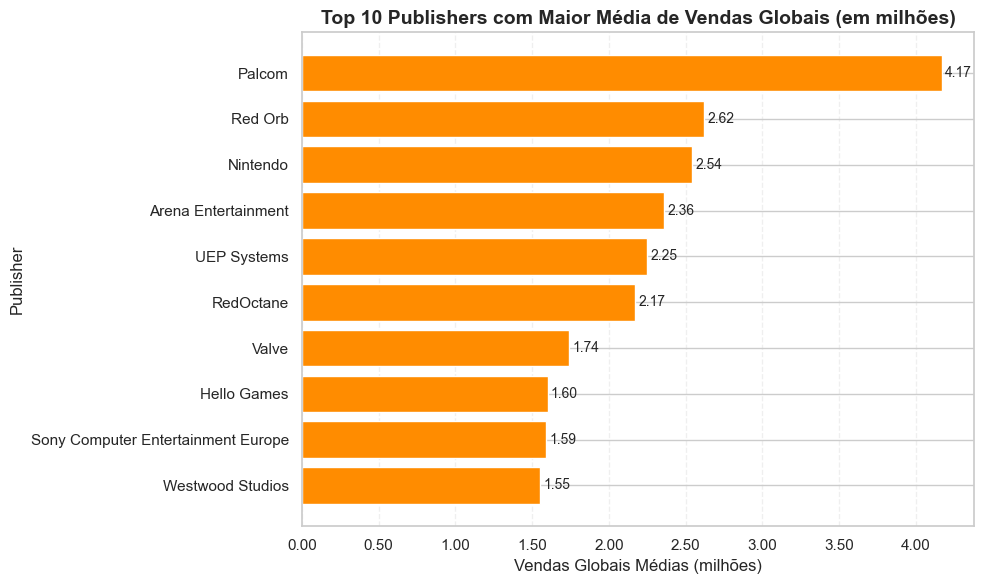

In [59]:
# Pega os 10 publishers com maior média de vendas
top_publishers = media_por_publisher.sort_values(ascending=True).tail(10)

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.barh(top_publishers.index, top_publishers.values, color='darkorange')

# Título e rótulos
ax.set_title('Top 10 Publishers com Maior Média de Vendas Globais (em milhões)', fontsize=14, weight='bold')
ax.set_xlabel('Vendas Globais Médias (milhões)', fontsize=12)
ax.set_ylabel('Publisher', fontsize=12)

# Formatador do eixo X com separador de milhar e 2 casas decimais
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.2f}'))

# Adiciona rótulos nas barras
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.02, bar.get_y() + bar.get_height() / 2,
            f'{width:.2f}', va='center', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## Comparação: Vendas Médias por Gênero e Publisher
Para entender quais características influenciam o sucesso de vendas dos jogos, foi realizada uma análise comparativa entre os gêneros e os publishers com base na média de vendas globais por título.

- Vendas por Gênero
A análise revelou que jogos do gênero Platform lideram em média de vendas, ultrapassando 930 mil unidades por jogo. Isso é impulsionado por franquias clássicas como Mario e Donkey Kong. Em seguida, destacam-se os gêneros Shooter e Role-Playing, ambos com forte apelo de mercado e títulos de grande sucesso, como Call of Duty e Final Fantasy.

Gêneros como Adventure e Strategy, apesar de populares em nichos específicos, apresentam as menores médias de vendas — abaixo de 300 mil unidades por título —, indicando uma penetração de mercado mais limitada ou títulos com menor apelo comercial.

- Vendas por Publisher
Entre os publishers, os líderes em vendas médias por jogo são nomes consagrados como Nintendo, Sony Computer Entertainment e Take-Two Interactive. Esses publishers concentram franquias de alto desempenho e amplo alcance global, o que eleva significativamente suas médias de vendas.

A diferença entre os publishers de topo e os demais é mais acentuada do que entre os gêneros, sugerindo que o prestígio da marca e a força das franquias podem ter um impacto ainda maior no desempenho comercial do que o gênero do jogo.